# BCG Virtual: Data Science & Advanced Analytics

**Sub-task 1:**
Think through what key drivers of churn could be for our client

**Sub-task 2:** 
Build the features in order to get ready to model

# Part I: Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
date_cols=['date_activ','date_end','date_modif_prod','date_renewal']
train_df = pd.read_csv('train_clean.csv',parse_dates=date_cols)
train_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,4660.0,0.0,0.0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
1,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544.0,0.0,0.0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
2,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584.0,0.0,0.0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
3,149d57cf92fc41cf94415803a877cb4b,foosdfpfkusacimwkcsosbicdxkicaua,4425.0,0.0,526.0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526.0,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
4,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302.0,0.0,1998.0,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998.0,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1


In [3]:
history_df = pd.read_csv('history_clean.csv',parse_dates=['price_date'])
history_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [4]:
train_df.shape

(13206, 26)

In [5]:
history_df.shape

(193002, 8)

# Part II: Feature Engineering for Train Data

## Numerical Data

### Distribution transformation
According to previous EDA, some features about consumptions and forecast consumptions are highly skewed. It would be before to transform the distribution to normal-like distribution.

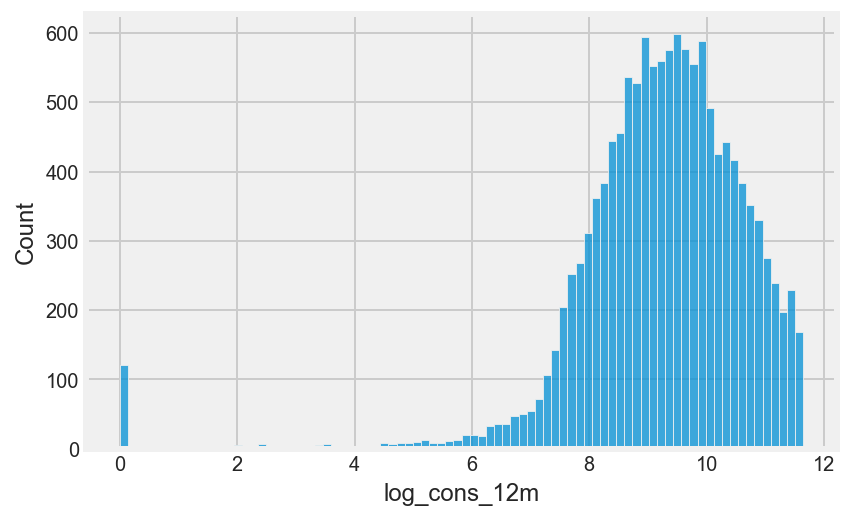

In [6]:
train_df['log_cons_12m'] = train_df['cons_12m'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_cons_12m");

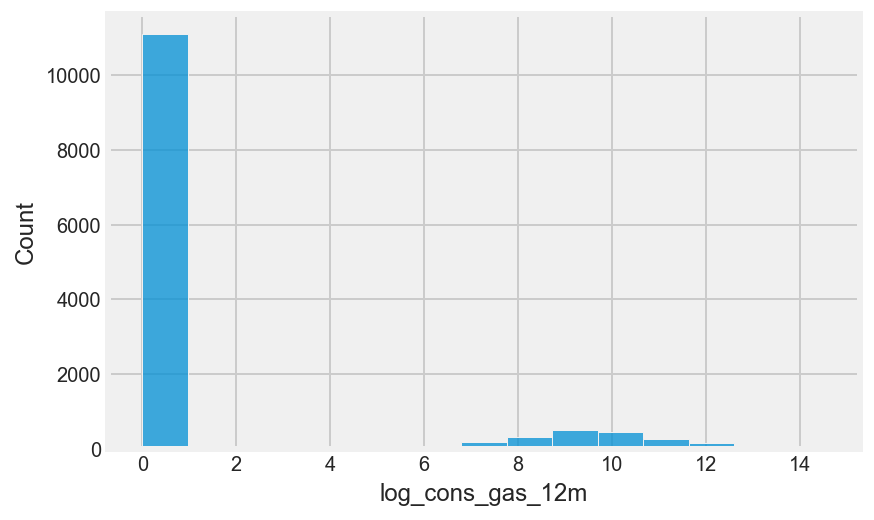

In [7]:
train_df['log_cons_gas_12m'] = train_df['cons_gas_12m'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_cons_gas_12m");

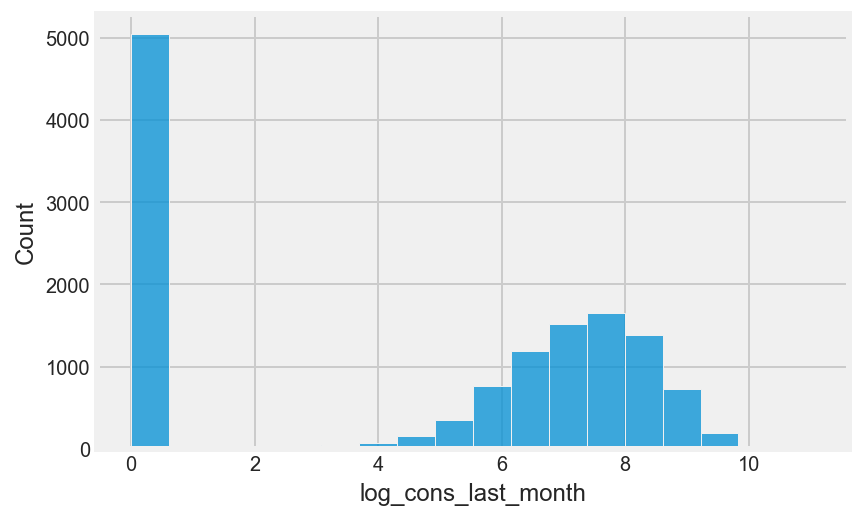

In [8]:
train_df['log_cons_last_month'] = train_df['cons_last_month'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_cons_last_month");

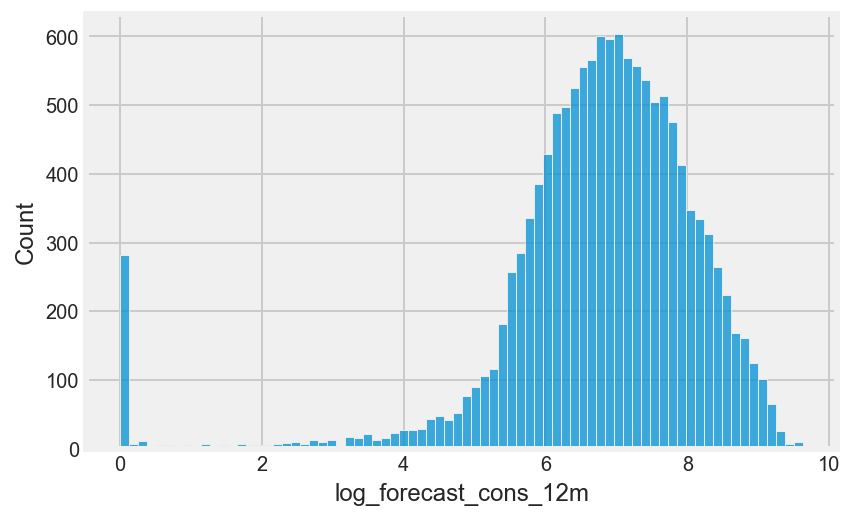

In [9]:
train_df['log_forecast_cons_12m'] = train_df['forecast_cons_12m'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_forecast_cons_12m");

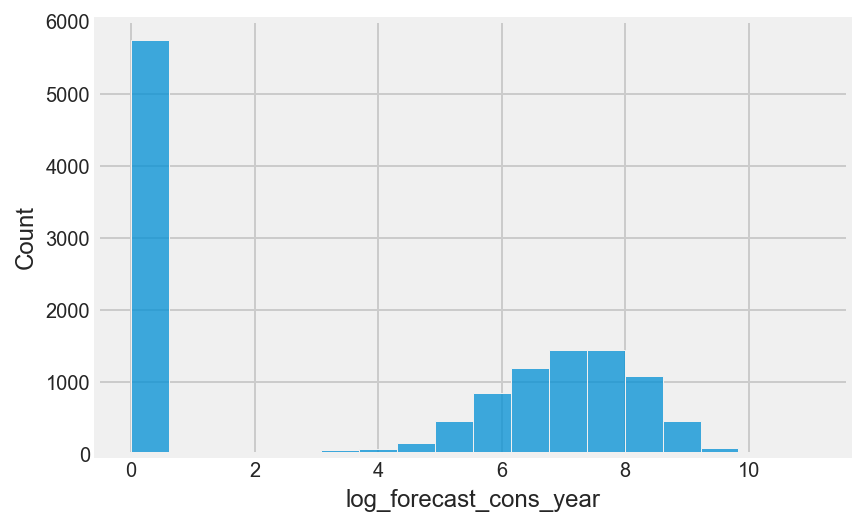

In [10]:
train_df['log_forecast_cons_year'] = train_df['forecast_cons_year'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_forecast_cons_year");


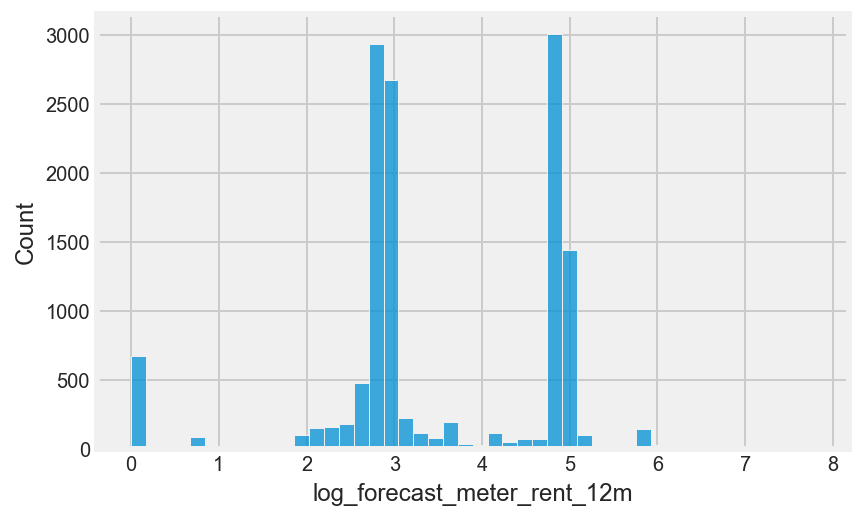

In [11]:
train_df['log_forecast_meter_rent_12m'] = train_df['forecast_meter_rent_12m'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_forecast_meter_rent_12m");

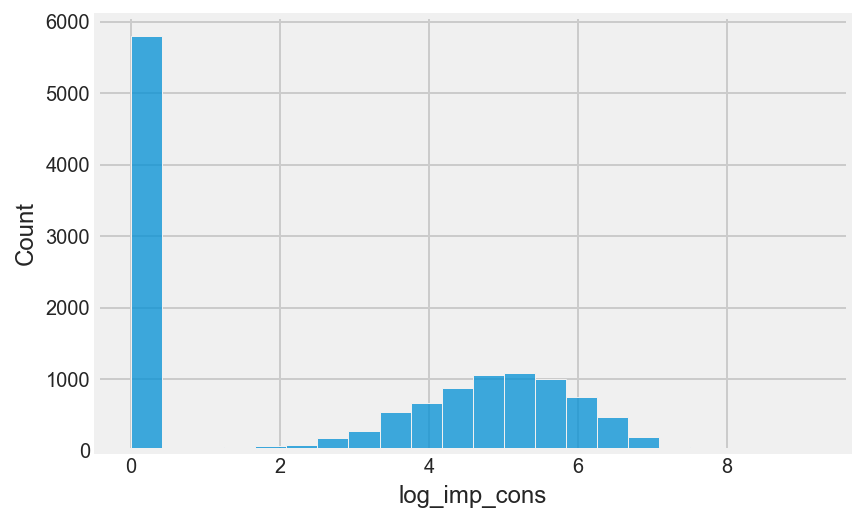

In [12]:
train_df.loc[train_df['imp_cons']<0, 'imp_cons']=train_df['imp_cons'].median()

train_df['log_imp_cons'] = train_df['imp_cons'].apply(lambda x:np.log(1+x))

# check the distribution again
sns.histplot(data=train_df, x="log_imp_cons");

In [13]:
train_df = train_df.drop(['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year',
                         'forecast_meter_rent_12m','imp_cons'], axis = 1)

In [14]:
train_df.head()

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons
0,d29c2c54acc38ff3c0614d0a653813dd,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,0.145711,0.000000,44.311378,f,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000
1,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,0.165794,0.087899,44.311378,f,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000
2,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,0.146694,0.000000,44.311378,f,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000
3,149d57cf92fc41cf94415803a877cb4b,foosdfpfkusacimwkcsosbicdxkicaua,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0.0,0.116900,0.100015,40.606701,f,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311
4,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,2011-12-09,2016-12-09,2015-11-01,2015-12-10,0.0,0.164775,0.086131,45.308378,f,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160


## Categorical Data

### binary encoding

Encode the feature `has_gas` to be: t:1, f:0

In [15]:
train_df['has_gas']= np.where(train_df['has_gas'] == 't', 1, 0)

### one-hot encoding

In [16]:
# For simplicity, only keep the first two letter of sales channels
train_df['channel_sales']= train_df['channel_sales'].apply(lambda x:x[:2])
train_df.head()

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons
0,d29c2c54acc38ff3c0614d0a653813dd,fo,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000
1,764c75f661154dac3a6c254cd082ea7d,fo,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000
2,bba03439a292a1e166f80264c16191cb,lm,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000
3,149d57cf92fc41cf94415803a877cb4b,fo,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311
4,1aa498825382410b098937d65c4ec26d,us,2011-12-09,2016-12-09,2015-11-01,2015-12-10,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160


In [17]:
# `channel_sales`: One-hot encoding
onehot_features = pd.get_dummies(train_df[['channel_sales']])
train_df= pd.concat([train_df, onehot_features], axis =1)
train_df.head()

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,channel_sales_us
0,d29c2c54acc38ff3c0614d0a653813dd,fo,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,0
1,764c75f661154dac3a6c254cd082ea7d,fo,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,0
2,bba03439a292a1e166f80264c16191cb,lm,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,0
3,149d57cf92fc41cf94415803a877cb4b,fo,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,0
4,1aa498825382410b098937d65c4ec26d,us,2011-12-09,2016-12-09,2015-11-01,2015-12-10,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,1


In [18]:
# `origin_up`: One-hot encoding
train_df['origin_up']= train_df['origin_up'].apply(lambda x:x[:2])
onehot_features = pd.get_dummies(train_df[['origin_up']])
train_df= pd.concat([train_df, onehot_features], axis =1)
train_df.head()

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,channel_sales_us,origin_up_ew,origin_up_ka,origin_up_ld,origin_up_lx,origin_up_us
0,d29c2c54acc38ff3c0614d0a653813dd,fo,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,ka,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,0,0,1,0,0,0
1,764c75f661154dac3a6c254cd082ea7d,fo,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,ka,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,0,0,1,0,0,0
2,bba03439a292a1e166f80264c16191cb,lm,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,ka,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,0,0,1,0,0,0
3,149d57cf92fc41cf94415803a877cb4b,fo,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,ka,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,0,0,1,0,0,0
4,1aa498825382410b098937d65c4ec26d,us,2011-12-09,2016-12-09,2015-11-01,2015-12-10,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,lx,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,1,0,0,0,1,0


In [19]:
train_df = train_df.drop(['channel_sales','origin_up'], axis = 1)

## Datetime

In [20]:
# extract contract duration
train_df['contract_duration']  = ((train_df['date_end'] - train_df['date_activ'])/np.timedelta64(1, 'M'))
train_df['contract_duration'] = train_df['contract_duration'].astype(int)
train_df.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,channel_sales_us,origin_up_ew,origin_up_ka,origin_up_ld,origin_up_lx,origin_up_us,contract_duration
0,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,0,0,1,0,0,0,84
1,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,0,0,1,0,0,0,72
2,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,0,0,1,0,0,0,72
3,149d57cf92fc41cf94415803a877cb4b,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,0,0,1,0,0,0,73
4,1aa498825382410b098937d65c4ec26d,2011-12-09,2016-12-09,2015-11-01,2015-12-10,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,1,0,0,0,1,0,60


In [21]:
# set reference time to be 2016-01-01
# calculate the month difference between datetime features
train_df['activ_diff']  = ((pd.to_datetime('2016-01-01') - train_df['date_activ'])/np.timedelta64(1, 'M'))
train_df['activ_diff'] = train_df['activ_diff'].astype(int)

train_df['end_diff']  = ((pd.to_datetime('2016-01-01') - train_df['date_end'])/np.timedelta64(1, 'M'))
train_df['end_diff'] = train_df['end_diff'].astype(int)

train_df['modif_diff']  = ((pd.to_datetime('2016-01-01') - train_df['date_modif_prod'])/np.timedelta64(1, 'M'))
train_df['modif_diff'] = train_df['modif_diff'].astype(int)

train_df['renewal_diff']  = ((pd.to_datetime('2016-01-01') - train_df['date_renewal'])/np.timedelta64(1, 'M'))
train_df['renewal_diff'] = train_df['renewal_diff'].astype(int)

train_df.head()

,id,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,channel_sales_us,origin_up_ew,origin_up_ka,origin_up_ld,origin_up_lx,origin_up_us,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,0,0,1,0,0,0,84,76,-7,76,4
1,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,0,0,1,0,0,0,72,68,-3,68,8
2,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,0,0,1,0,0,0,72,69,-2,69,9
3,149d57cf92fc41cf94415803a877cb4b,2010-01-13,2016-03-07,2010-01-13,2015-03-09,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,0,0,1,0,0,0,73,71,-2,71,9
4,1aa498825382410b098937d65c4ec26d,2011-12-09,2016-12-09,2015-11-01,2015-12-10,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,1,0,0,0,1,0,60,48,-11,2,0


In [22]:
train_df = train_df.drop(['date_activ','date_end','date_modif_prod','date_renewal'], axis = 1)

In [23]:
train_df.head()

,id,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,channel_sales_us,origin_up_ew,origin_up_ka,origin_up_ld,origin_up_lx,origin_up_us,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff
0,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,0,0,1,0,0,0,84,76,-7,76,4
1,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,0,0,1,0,0,0,72,68,-3,68,8
2,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,0,0,1,0,0,0,72,69,-2,69,9
3,149d57cf92fc41cf94415803a877cb4b,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,0,0,1,0,0,0,73,71,-2,71,9
4,1aa498825382410b098937d65c4ec26d,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,1,0,0,0,1,0,60,48,-11,2,0


# Part III: Feature Engineering for History Data

In [24]:
history_df.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [25]:
# calculate mean/std of price for each id
stats = history_df.groupby('id').agg([np.mean, np.std]).reset_index()
stats.columns=['id', 'price_p1_var_mean', 'price_p1_var_std', 'price_p2_var_mean', 'price_p2_var_std',
              'price_p3_var_mean', 'price_p3_var_std','price_p1_fix_mean', 'price_p1_fix_std',
             'price_p2_fix_mean', 'price_p2_fix_std','price_p3_fix_mean', 'price_p3_fix_std']
stats.head()

,id,price_p1_var_mean,price_p1_var_std,price_p2_var_mean,price_p2_var_std,price_p3_var_mean,price_p3_var_std,price_p1_fix_mean,price_p1_fix_std,price_p2_fix_mean,price_p2_fix_std,price_p3_fix_mean,price_p3_fix_std
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.003976,0.103794,0.001989,0.073160,0.001368,40.701732,6.341481e-02,24.421038,0.038049,16.280694,0.025366
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.002197,0.000000,0.000000,0.000000,0.000000,44.385450,8.753223e-02,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.026008,0.000000,0.000000,0.000000,0.000000,45.319710,7.723930e-01,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.005049,0.098292,0.002580,0.069032,0.000403,40.647427,8.507958e-02,24.388455,0.051048,16.258971,0.034032
4,00114d74e963e47177db89bc70108537,0.147926,0.002202,0.000000,0.000000,0.000000,0.000000,44.266930,5.908392e-07,0.000000,0.000000,0.000000,0.000000


In [26]:
# calculate 3 month moving average prices for each id
month_3_df = history_df[history_df['price_date']>='2015-10-01']
m3_moving_avg = month_3_df.groupby('id').mean().reset_index()
m3_moving_avg.columns=['id','price_p1_var_m3','price_p2_var_m3','price_p3_var_m3','price_p1_fix_m3','price_p2_fix_m3','price_p3_fix_m3']
m3_moving_avg.head()

,id,price_p1_var_m3,price_p2_var_m3,price_p3_var_m3,price_p1_fix_m3,price_p2_fix_m3,price_p3_fix_m3
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000


In [27]:
# calculate 6 month moving average prices for each id
month_6_df = history_df[history_df['price_date']>='2015-07-01']
m6_moving_avg = month_6_df.groupby('id').mean().reset_index()
m6_moving_avg.columns=['id','price_p1_var_m6','price_p2_var_m6','price_p3_var_m6','price_p1_fix_m6','price_p2_fix_m6','price_p3_fix_m6']
m6_moving_avg.head()

,id,price_p1_var_m6,price_p2_var_m6,price_p3_var_m6,price_p1_fix_m6,price_p2_fix_m6,price_p3_fix_m6
0,0002203ffbb812588b632b9e628cc38d,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000


In [28]:
history_new = pd.merge(stats,m3_moving_avg, on='id',how='left')
history_new = pd.merge(stats,m6_moving_avg, on='id',how='left')
history_new.head()

,id,price_p1_var_mean,price_p1_var_std,price_p2_var_mean,price_p2_var_std,price_p3_var_mean,price_p3_var_std,price_p1_fix_mean,price_p1_fix_std,price_p2_fix_mean,price_p2_fix_std,price_p3_fix_mean,price_p3_fix_std,price_p1_var_m6,price_p2_var_m6,price_p3_var_m6,price_p1_fix_m6,price_p2_fix_m6,price_p3_fix_m6
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.003976,0.103794,0.001989,0.073160,0.001368,40.701732,6.341481e-02,24.421038,0.038049,16.280694,0.025366,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.002197,0.000000,0.000000,0.000000,0.000000,44.385450,8.753223e-02,0.000000,0.000000,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.026008,0.000000,0.000000,0.000000,0.000000,45.319710,7.723930e-01,0.000000,0.000000,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.005049,0.098292,0.002580,0.069032,0.000403,40.647427,8.507958e-02,24.388455,0.051048,16.258971,0.034032,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555
4,00114d74e963e47177db89bc70108537,0.147926,0.002202,0.000000,0.000000,0.000000,0.000000,44.266930,5.908392e-07,0.000000,0.000000,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000


In [29]:
history_new.shape

(16096, 19)

# Part IV: Merge Data Together

In [30]:
df = pd.merge(train_df, history_new, on='id', how = 'left')
df.head()

,id,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,...,origin_up_lx,origin_up_us,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,price_p1_var_mean,price_p1_var_std,price_p2_var_mean,price_p2_var_std,price_p3_var_mean,price_p3_var_std,price_p1_fix_mean,price_p1_fix_std,price_p2_fix_mean,price_p2_fix_std,price_p3_fix_mean,price_p3_fix_std,price_p1_var_m6,price_p2_var_m6,price_p3_var_m6,price_p1_fix_m6,price_p2_fix_m6,price_p3_fix_m6
0,d29c2c54acc38ff3c0614d0a653813dd,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,...,0,0,84,76,-7,76,4,0.137439,0.043324,0.000000,0.000000,0.000000,0.000000,44.205798,3.878944e-01,0.833333,2.886751,0.500000,1.732051,0.123512,0.000000,0.000000,44.144665,1.666667,1.000000
1,764c75f661154dac3a6c254cd082ea7d,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,...,0,0,72,68,-3,68,8,0.170512,0.002396,0.088421,0.000506,0.000000,0.000000,44.385450,8.753223e-02,0.000000,0.000000,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000
2,bba03439a292a1e166f80264c16191cb,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,...,0,0,72,69,-2,69,9,0.151210,0.002317,0.000000,0.000000,0.000000,0.000000,44.400265,8.040349e-02,0.000000,0.000000,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000
3,149d57cf92fc41cf94415803a877cb4b,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,...,0,0,73,71,-2,71,9,0.124174,0.003847,0.103638,0.001885,0.072865,0.001588,40.688156,7.368135e-02,24.412893,0.044209,16.275263,0.029473,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555
4,1aa498825382410b098937d65c4ec26d,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,...,1,0,60,48,-11,2,0,0.168953,0.003636,0.087632,0.001858,0.000000,0.000000,44.266930,6.179144e-07,0.000000,0.000000,0.000000,0.000000,0.166160,0.086450,0.000000,44.266930,0.000000,0.000000


In [31]:
df.isnull().sum().sort_values(ascending = False)

price_p3_fix_m6      0
log_cons_12m         0
channel_sales_sd     0
channel_sales_lm     0
channel_sales_fo     0
                    ..
activ_diff           0
contract_duration    0
origin_up_us         0
origin_up_lx         0
id                   0
Length: 54, dtype: int64

In [37]:
df=df.drop('id', axis = 1)

In [39]:
df.head()

,forecast_discount_energy,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_meter_rent_12m,log_imp_cons,channel_sales_ep,channel_sales_ew,channel_sales_fo,channel_sales_lm,channel_sales_sd,channel_sales_us,...,origin_up_lx,origin_up_us,contract_duration,activ_diff,end_diff,modif_diff,renewal_diff,price_p1_var_mean,price_p1_var_std,price_p2_var_mean,price_p2_var_std,price_p3_var_mean,price_p3_var_std,price_p1_fix_mean,price_p1_fix_std,price_p2_fix_mean,price_p2_fix_std,price_p3_fix_mean,price_p3_fix_std,price_p1_var_m6,price_p2_var_m6,price_p3_var_m6,price_p1_fix_m6,price_p2_fix_m6,price_p3_fix_m6
0,0.0,0.145711,0.000000,44.311378,0,16.38,16.38,1,18.89,6,13.800,0,8.446985,0.0,0.000000,5.252012,0.000000,2.848971,0.000000,0,0,1,0,0,0,...,0,0,84,76,-7,76,4,0.137439,0.043324,0.000000,0.000000,0.000000,0.000000,44.205798,3.878944e-01,0.833333,2.886751,0.500000,1.732051,0.123512,0.000000,0.000000,44.144665,1.666667,1.000000
1,0.0,0.165794,0.087899,44.311378,0,28.60,28.60,1,6.60,6,13.856,0,6.300786,0.0,0.000000,3.891004,0.000000,3.681855,0.000000,0,0,1,0,0,0,...,0,0,72,68,-3,68,8,0.170512,0.002396,0.088421,0.000506,0.000000,0.000000,44.385450,8.753223e-02,0.000000,0.000000,0.000000,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000
2,0.0,0.146694,0.000000,44.311378,0,30.22,30.22,1,25.46,6,13.200,0,7.368340,0.0,0.000000,5.484963,0.000000,3.036394,0.000000,0,0,0,1,0,0,...,0,0,72,69,-2,69,9,0.151210,0.002317,0.000000,0.000000,0.000000,0.000000,44.400265,8.040349e-02,0.000000,0.000000,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000
3,0.0,0.116900,0.100015,40.606701,0,44.91,44.91,1,47.98,6,19.800,0,8.395252,0.0,6.267201,6.101999,6.267201,4.888317,3.976311,0,0,1,0,0,0,...,0,0,73,71,-2,71,9,0.124174,0.003847,0.103638,0.001885,0.072865,0.001588,40.688156,7.368135e-02,24.412893,0.044209,16.275263,0.029473,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555
4,0.0,0.164775,0.086131,45.308378,0,33.12,33.12,1,118.89,4,13.200,1,9.024372,0.0,7.600402,6.682033,7.600402,3.437851,5.205160,0,0,0,0,0,1,...,1,0,60,48,-11,2,0,0.168953,0.003636,0.087632,0.001858,0.000000,0.000000,44.266930,6.179144e-07,0.000000,0.000000,0.000000,0.000000,0.166160,0.086450,0.000000,44.266930,0.000000,0.000000


In [38]:
df.to_csv('feature_engineering.csv', index = False)